<a href="https://colab.research.google.com/github/wissemkarous/RechercheOPproject/blob/main/Copy_of_projet1_wissemkarous_1GT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import random
import networkx as nx
import matplotlib.pyplot as plt

# Nombre minimum de nœuds et d'arcs
min_nodes = 20
min_edges = 50

In [38]:
# Nombre aléatoire de nœuds et d'arcs
num_nodes = random.randint(min_nodes, min_nodes+10)
num_edges = random.randint(min_edges, min_edges+50)

In [39]:
# Intervalle de valeurs aléatoires pour les coûts et les capacités
plage_couts = [0, 10]
plage_capacites = [0, 20]

In [40]:
# Création d'un graphe orienté aléatoire avec des capacités et des coûts aléatoires
G = nx.DiGraph()
G.add_nodes_from(range(num_nodes))
for i in range(num_edges):
    # Sélection aléatoire d'un nœud de départ et d'arrivée
    noeud_depart = random.randint(0, num_nodes-1)
    noeud_arrivee = random.randint(0, num_nodes-1)
    # Vérification pour éviter les boucles et les doublons
    while noeud_arrivee == noeud_depart or G.has_edge(noeud_depart, noeud_arrivee):
        noeud_depart = random.randint(0, num_nodes-1)
        noeud_arrivee = random.randint(0, num_nodes-1)
    # Attribution aléatoire de capacités et de coûts pour l'arc
    capacite = random.randint(plage_capacites[0], plage_capacites[1])
    cout = random.randint(plage_couts[0], plage_couts[1])
    # Ajout de l'arc avec les capacités et les coûts attribués
    G.add_edge(noeud_depart, noeud_arrivee, capacite=capacite, cout=cout)

In [41]:
# Affichage du graphe généré
print("Graphe généré :")
print("Nombre de nœuds :", G.number_of_nodes())
print("Nombre d'arcs :", G.number_of_edges())
print("Liste des arcs avec capacités et coûts :")
for arc in G.edges():
    print("Arc :", arc, "Capacité maximale :", G[arc[0]][arc[1]]['capacite'], "Coût unitaire :", G[arc[0]][arc[1]]['cout'])

Graphe généré :
Nombre de nœuds : 23
Nombre d'arcs : 70
Liste des arcs avec capacités et coûts :
Arc : (0, 13) Capacité maximale : 9 Coût unitaire : 7
Arc : (0, 4) Capacité maximale : 20 Coût unitaire : 4
Arc : (1, 15) Capacité maximale : 20 Coût unitaire : 9
Arc : (1, 22) Capacité maximale : 4 Coût unitaire : 8
Arc : (1, 20) Capacité maximale : 3 Coût unitaire : 9
Arc : (1, 12) Capacité maximale : 17 Coût unitaire : 1
Arc : (1, 2) Capacité maximale : 19 Coût unitaire : 0
Arc : (2, 7) Capacité maximale : 17 Coût unitaire : 10
Arc : (2, 17) Capacité maximale : 14 Coût unitaire : 9
Arc : (2, 13) Capacité maximale : 6 Coût unitaire : 6
Arc : (2, 9) Capacité maximale : 8 Coût unitaire : 2
Arc : (2, 10) Capacité maximale : 19 Coût unitaire : 3
Arc : (2, 22) Capacité maximale : 20 Coût unitaire : 1
Arc : (3, 0) Capacité maximale : 11 Coût unitaire : 2
Arc : (3, 5) Capacité maximale : 19 Coût unitaire : 5
Arc : (3, 12) Capacité maximale : 7 Coût unitaire : 6
Arc : (4, 2) Capacité maximale : 3

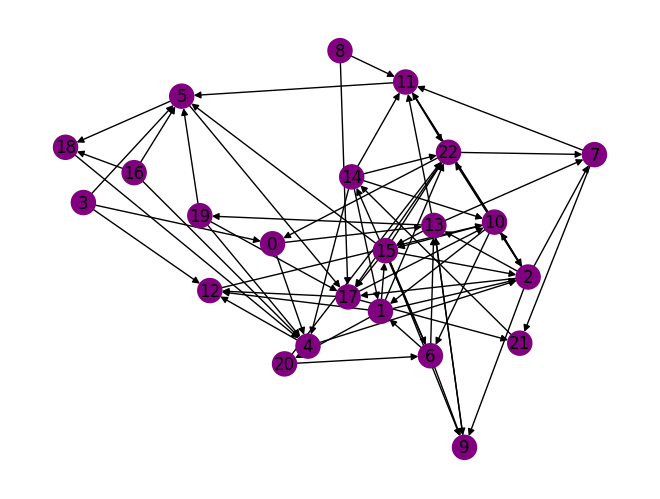

In [42]:
# Définition des couleurs des nœuds
couleurs = ["purple"] * num_nodes

# Affichage du schéma du graphe avec des nœuds verts
nx.draw(G, with_labels=True, node_color=couleurs)
plt.show()

In [35]:
#Projet 1: Probleme de flot a cout minimum avec capacite


In [ ]:
import random

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 62.7 MB/s eta 0:00:00


In [32]:
from pulp import *

# Données d'entrée
N = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] # ensemble de nœuds
arcs = [(1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 5), (4, 6), (5, 4), (5, 7), (6, 5), (6, 8), (7, 6), (7, 9), (8, 7), (8, 10), (9, 8), (9, 10)] # ensemble d'arcs
capacites = {(1, 2): 10, (1, 3): 5, (2, 3): 3, (2, 4): 2, (2, 5): 2, (3, 5): 4, (4, 6): 6, (5, 4): 1, (5, 7): 3, (6, 5): 1, (6, 8): 2, (7, 6): 1, (7, 9): 2, (8, 7): 2, (8, 10): 4, (9, 8): 3, (9, 10): 5} # capacités des arcs
couts = {(1, 2): 5, (1, 3): 2, (2, 3): 2, (2, 4): 1, (2, 5): 6, (3, 5): 1, (4, 6): 3, (5, 4): 3, (5, 7): 2, (6, 5): 1, (6, 8): 2, (7, 6): 3, (7, 9): 3, (8, 7): 1, (8, 10): 4, (9, 8): 2, (9, 10): 6} # coûts des arcs
S = [1, 2, 3, 4, 5] # ensemble de sources
T = [6, 7, 8, 9, 10, 11, 12, 13] # ensemble de destinations

# Création du problème
prob = LpProblem("Probleme de flot a cout minimum avec capacite", LpMinimize)

# Variables de décision
flot = LpVariable.dicts("flot", arcs, lowBound=0, cat='Continuous')

# Fonction objective
prob += lpSum([couts[a] * flot[a] for a in arcs])

# Contraintes de capacité des arcs
for a in arcs:
    prob += flot[a] <= capacites[a]

# Contraintes de conservation de flux en chaque nœud
for n in N:
 if n in S:
   prob += lpSum([flot[a] for a in arcs if a[1] == n]) - lpSum([flot[a] for a in arcs if a[0] == n]) >= 1
 elif n in T:
   prob += lpSum([flot[a] for a in arcs if a[1] == n]) - lpSum([flot[a] for a in arcs if a[0] == n]) <= -1
 else:
  prob += lpSum([flot[a] for a in arcs if a[1] == n]) - lpSum([flot[a] for a in arcs if a[0] == n]) == 0
  #
  prob.solve()
  print("Status:", LpStatus[prob.status])
  for v in prob.variables():
   print(v.name, "=", v.varValue)
   print("Coût total du réseau =", value(prob.objective))

In [33]:
# Calcul de la capacité totale entrante des nœuds sources
capacite_entree = 0
for a in arcs:
    if a[1] in S:
        capacite_entree += capacites[a]

# Définition des valeurs d'offre de trafic pour chaque nœud source
offres_trafic = {}
for n in S:
    offre_max = capacite_entree / len(S)  # offre maximale pour chaque nœud source
    offre = random.uniform(0, offre_max)  # offre aléatoire entre 0 et l'offre maximale
    offres_trafic[n] = offre

# Affectation des valeurs d'offre de trafic aux variables de décision
for a in arcs:
    if a[0] in S:
        prob += lpSum([flot[a]]) == offres_trafic[a[0]]
print (prob)

Probleme_de_flot_a_cout_minimum_avec_capacite:
MINIMIZE
5*flot_(1,_2) + 2*flot_(1,_3) + 2*flot_(2,_3) + 1*flot_(2,_4) + 6*flot_(2,_5) + 1*flot_(3,_5) + 3*flot_(4,_6) + 3*flot_(5,_4) + 2*flot_(5,_7) + 1*flot_(6,_5) + 2*flot_(6,_8) + 3*flot_(7,_6) + 3*flot_(7,_9) + 4*flot_(8,_10) + 1*flot_(8,_7) + 6*flot_(9,_10) + 2*flot_(9,_8) + 0
SUBJECT TO
_C1: flot_(1,_2) <= 10

_C2: flot_(1,_3) <= 5

_C3: flot_(2,_3) <= 3

_C4: flot_(2,_4) <= 2

_C5: flot_(2,_5) <= 2

_C6: flot_(3,_5) <= 4

_C7: flot_(4,_6) <= 6

_C8: flot_(5,_4) <= 1

_C9: flot_(5,_7) <= 3

_C10: flot_(6,_5) <= 1

_C11: flot_(6,_8) <= 2

_C12: flot_(7,_6) <= 1

_C13: flot_(7,_9) <= 2

_C14: flot_(8,_7) <= 2

_C15: flot_(8,_10) <= 4

_C16: flot_(9,_8) <= 3

_C17: flot_(9,_10) <= 5

_C18: - flot_(1,_2) - flot_(1,_3) >= 1

_C19: flot_(1,_2) - flot_(2,_3) - flot_(2,_4) - flot_(2,_5) >= 1

_C20: flot_(1,_3) + flot_(2,_3) - flot_(3,_5) >= 1

_C21: flot_(2,_4) - flot_(4,_6) + flot_(5,_4) >= 1

_C22: flot_(2,_5) + flot_(3,_5) - flot_(5,_4)

In [21]:
import random

# dt_bar est la valeur maximale de la demande de trafic
dt_bar = 10

# Affectation des demandes de trafic sur les noeuds de destination
demandes = {}
for n in T:
    demandes[n] = random.uniform(0, dt_bar)

print(demandes)


{6: 3.2023110269732458, 7: 1.126412948204485, 8: 2.142192495166999, 9: 1.7080723836322498, 10: 1.8189883919300331, 11: 3.713293073050016, 12: 9.403518795699533, 13: 1.443332047261432}


In [16]:
#ajout de contarinte  Pour s'assurer que le total de l'offre soit égal au total de la demande à notre problème : 
prob += lpSum(demandes) == lpSum(offres_trafic), "Contrainte d'équilibre offre-demande"


In [34]:
# Définition des variables de décision
flot = LpVariable.dicts("flot", arcs, lowBound=0, cat='Continuous')

# Définition des contraintes de capacité
for arc in arcs:
    i, j = arc
    prob += flot[arc] <= capacites[arc],f"Contrainte de capacité pour l'arc {arc}"

# Définition des contraintes de conservation de flux en chaque nœud
for noeud in N:
    if noeud in S or noeud in T:
        continue
    contrainte_entree = lpSum([flot[(i, j)] for (i, j) in arcs if j == noeud])
    contrainte_sortie = lpSum([flot[(i, j)] for (i, j) in arcs if i == noeud])
    prob += contrainte_entree == contrainte_sortie, f"Contrainte de conservation de flux pour le noeud {noeud}"

# Contraintes de non-négativité
for arc in arcs:
    prob += flot[arc] >= 0, f"Contrainte de non-négativité pour l'arc {arc}"
